**Instalando o tesseract no Windows**
* https://github.com/UB-Mannheim/tesseract/wiki - instalador do Tesseract p/ o Windows;

**Instalando o pacote português no Tesseract**
* https://github.com/tesseract-ocr/tessdata

---

* Tutorial 'Hashtag Programação': https://www.youtube.com/watch?v=Wx3SyNwZtsA
* O tutorial ensina a instalação do Tesseract no Windows e como instalar o pacote de português.

In [2]:
import cv2
import pytesseract
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import os

# Caminho do executável do pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

## Tutorial OCR 

* Playlist [OCR IN PYTHON](https://www.youtube.com/playlist?list=PL2VXyKi-KpYuTAZz__9KVl1jQz74bDG7i) do canal 'Python Tutorials for Digital Humanities'
* Repositório Github: https://github.com/wjbmattingly/ocr_python_textbook/tree/main



### How to Preprocess Images for Text OCR in Python

* https://www.youtube.com/watch?v=ADV-AjAXHdc&list=PL2VXyKi-KpYuTAZz__9KVl1jQz74bDG7i&index=4
* Vou utilizar as imagens da Abicom ao invés das imagens do tutorial.

In [3]:
# Caminho completo de cada imagem da Abicom
images_file = glob(r'C:\Users\vitor\projetos_python\python_b3\historico-arquivos\imagem-abicom\*.png')

# Apenas os nomes das imagens
names_item = [os.path.basename(item) for item in glob('C://Users//vitor//projetos_python//python_b3//historico-arquivos//imagem-abicom//*.png')]

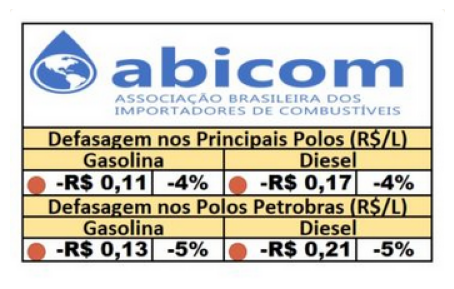

In [4]:
def display_image_in_actual_size(im_path: str):
    """
    Função que plota a imagem em sua escala original.

    Parameters:
    im_path(str): caminho do diretório da imagem.

    Returns:
    Imagem em sua escala original
    """
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

display_image_in_actual_size(images_file[-1])

#### Inverted Image

* Inverter a imagem - invertendo todos os pixels da imagem;
* Para rodar esse código, eu tive que primeiro transformar a figura em cinza e depois fazer a inversão;
* No vídeo, a imagem de exemplo não é colorida, eu acho que por isso ele conseguuiu fazer a inversão direta.

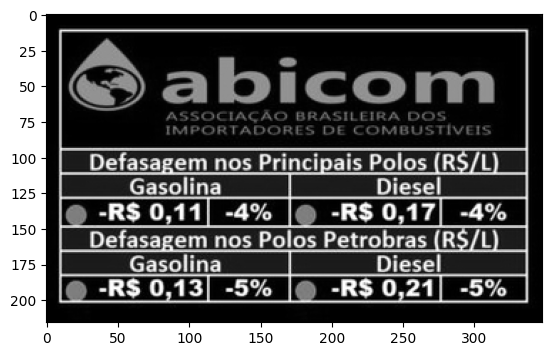

In [5]:
# Lendo a imagem
img = cv2.imread(images_file[-1])

# Transformando a imagem em cinza 
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invertendo a imagem
inverted_image = cv2.bitwise_not(gray_image)

# Salvando a imagem 
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//abicom-img-alteradas//inverted_img.jpg', inverted_image)

# Plotando a imagem
plt.imshow(inverted_image, cmap='gray')


#### Binarization

* Transforma a imagem em preto e branco;
* Sempre tem que transformar a imagem em cinza.

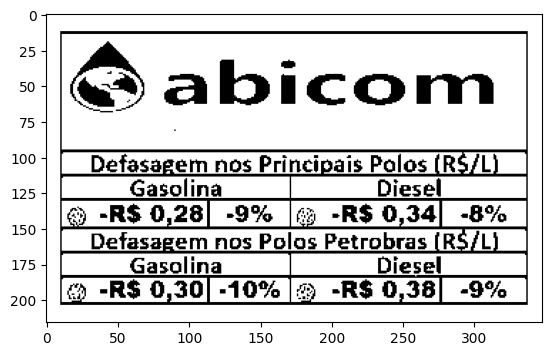

In [8]:
# Lendo a imagem
img = cv2.imread(images_file[-1])

# Transformando a imagem em cinza 
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Limite e imagem em preto e branco
thresh, im_bw = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Salvando a imagem 
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//abicom-img-alteradas//bw_img.jpg', im_bw)

# Plotando a imagem
plt.imshow(im_bw, cmap='gray')

#### Noise Removal

In [10]:
def noise_removal(img):
    """
    Função que remove os ruídos da imagem.

    Parameters:
    img: arquivo que é uma imagem

    Returns:
    Imagem tratada com a remoção dos ruídos.
    """
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(img, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(img, kernel, iterations=1)
    image = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(img, 3)

    return image

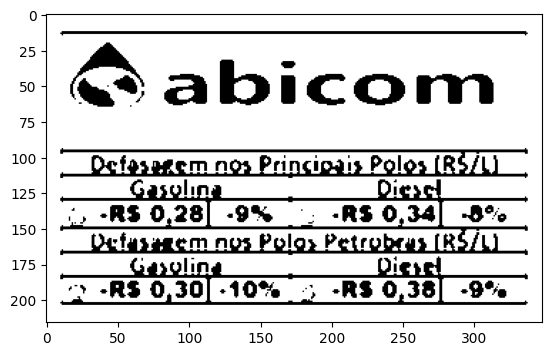

In [11]:
# Vamos utilizar a imagem em preto e branco
no_noise = noise_removal(im_bw)

# Salvando a imagem 
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//abicom-img-alteradas//no_noise_img.jpg', no_noise)

# Plotando a imagem
plt.imshow(no_noise, cmap='gray')

#### Dilation and Erosion

* Utilizar a dilatação e erosão podem ajudar a tratar a imagem quando você tem uma imagem que tem fontes muito grossas ou finas.

In [12]:
def thin_font(img):
    """
    Função que afina as fontes do texto da imagem.

    Parameters:
    img: arquivo que é uma imagem

    Returns:
    Imagem tratada com fontes menores.
    """
    image = cv2.bitwise_not(img)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.erode(img, kernel, iterations=1)
    image = cv2.bitwise_not(img)

    return image


def thick_font(img):
    """
    Função que engrossa as fontes do texto da imagem.

    Parameters:
    img: arquivo que é uma imagem

    Returns:
    Imagem tratada com fontes menores.
    """
    image = cv2.bitwise_not(img)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.dilate(img, kernel, iterations=1)
    image = cv2.bitwise_not(img)

    return image

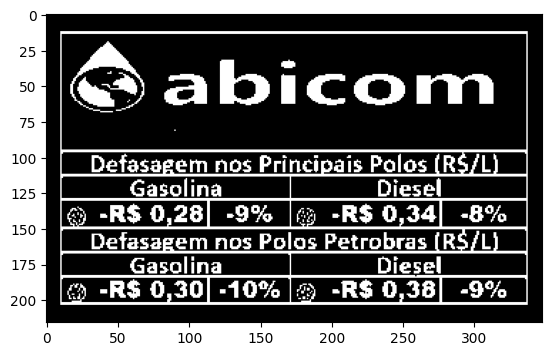

In [13]:
# No tutorial, ele utilizou a imagem sem ruído, mas eu vou utilizar a imagem em preto e branco
eroded_image = thin_font(im_bw)

# Salvando a imagem 
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//abicom-img-alteradas//eroded_img.jpg', eroded_image)

# Plotando a imagem
plt.imshow(eroded_image, cmap='gray')

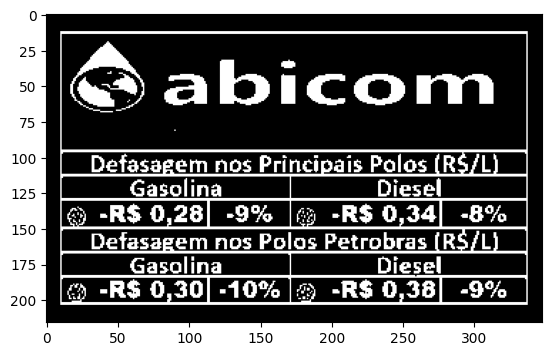

In [14]:
# Vamos utilizar a imagem em preto e branco
dilated_image = thick_font(im_bw)

# Salvando a imagem 
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//abicom-img-alteradas//dilated_img.jpg', dilated_image)

# Plotando a imagem
plt.imshow(dilated_image, cmap='gray')

#### Rotation/Deskewing

* Utiliza-se esse processo quando a imagem (texto) está torto. O OCR sempre espera que a imagem esteja reta;
* No caso das imagens da Abicom, elas estão retas. Então, não há necessidade de fazer esse processo;
* No vídeo, ele fala que não escreveu a função abaixo, ela foi retirada do site: https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df

In [ ]:
# Calculate skew angle of an image
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=5)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    minAreaRect = cv2.minAreaRect(largestContour)

    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

#### Removal Borders

* No exemplo do vídeo, a imagem que ele utiliza possui uma borda preta. As imagens da Abicom não possuem esse tipo de borda - a imagem fica igual quando eu rodo esse código;
* Ele sugere que o melhor método para retirar bordas é o 'bounding box' que vai ser explicado mais adiante.

In [15]:
def removal_borders(img):
    contours, heiarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntSorted = sorted(contours, key=lambda x: cv2.contourArea(x))
    cnt = cntSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = img[y:y+h, x:x+w]
    return crop

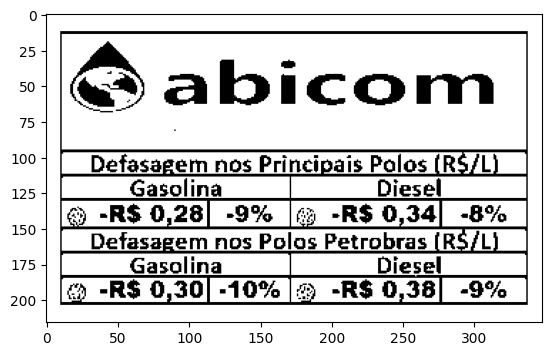

In [16]:
# Vamos utilizar a imagem em preto e branco
no_borders = removal_borders(im_bw)

# Salvando a imagem 
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//abicom-img-alteradas//no_borders_img.jpg', no_borders)

# Plotando a imagem
plt.imshow(no_borders, cmap='gray')

#### Missing Borders

* Adicionando bordas na imagem.

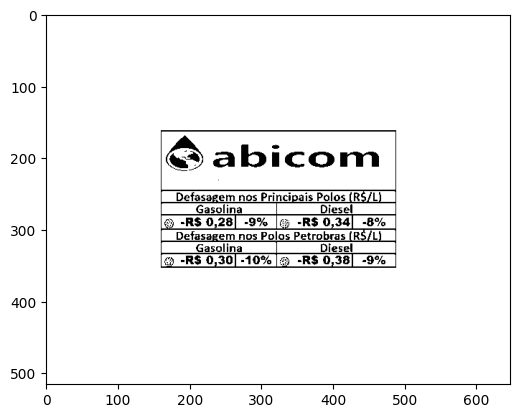

In [17]:
# RGB da cor branca
color = [255, 255, 255] 

# Tamanho da borda
top, bottom, left, right = [150] * 4

# Adicionando as bordas na imagem
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

# Salvando a imagem 
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//abicom-img-alteradas//with_borders_img.jpg', image_with_border)

# Plotando a imagem
plt.imshow(image_with_border, cmap='gray')

### How to use Bounding Boxes with OpenCV 

* https://www.youtube.com/watch?v=9FCw1xo_s0I&list=PL2VXyKi-KpYuTAZz__9KVl1jQz74bDG7i&index=7



In [9]:
# Lendo a imagem
image = cv2.imread('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//index_02.JPG')

# Transformando a imagem em cinza 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Adicionando blur na imagem
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Salvando a imagem
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//index_02_blur.JPG', blur)

True

In [10]:
# Criando os limites
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Salvando a imagem
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//index_02_thresh.JPG', thresh)

True

In [11]:
# Criando os kernels
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13))

# Salvando a imagem - ESSA IMAGEM NÃO VAI MOSTRAR NADA
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//index_02_kernel.JPG', kernel)

# Para ver essa imagem, vamos dilata-la
dilate = cv2.dilate(thresh, kernel, iterations=1)

# Salvando a imagem - essa imagem dilatada vai ajudar a criar os bounding boxes
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//index_02_dilate.JPG', dilate)

True

In [12]:
# Criando os contornos
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]

cnts = sorted(cnts, key= lambda x: cv2.boundingRect(x)[0])

# Marcando os contornos (retângulos) na imagem
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)

    # Condição para contornar somente os contornos que tenham a altura maior que 200 pixels e a largura maior que 20 pixels 
    if h > 200 and w > 20:
        # Selecionando um 'ROI' (Region of Interest)
        roi = image[y:y+h, x:x+h]
        cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//index_02_roi.JPG', roi)
        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)

# Salvando a imagem 
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//index_02_bbox.JPG', image)

True

### How to Create a List of Named Entities from an Index with OpenCV

* https://www.youtube.com/watch?v=y1iw8c2CEgw&list=PL2VXyKi-KpYuTAZz__9KVl1jQz74bDG7i&index=8

In [62]:
results = []
# Marcando os contornos (retângulos) na imagem
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)

    # Condição para contornar somente os contornos que tenham a altura maior que 200 pixels e a largura maior que 20 pixels 
    if h > 200 and w > 20:
        # Selecionando um 'ROI' (Region of Interest)
        roi = image[y:y+h, x:x+h]
        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)
        ocr_results = pytesseract.image_to_string(roi)
        ocr_results = ocr_results.split('\n')

        for item in ocr_results:
            item = item.strip()
            results.append(item)

print(results)

['A.v. E.', '', 'Abacuc propheta 36,5. 319, 29. 373, 23.', '', 'Abagarus rex Edessenorum 382, 13.', '', 'Abdenago 585, 3.', '', 'Abel 26, 11.', '', 'Abigail 606, 6.', '', 'Abraham 26,18, 124,18. 133, 23.', '', '264. 302, 13. 303, 13. 320, 40.', '', '496, 22.', '', 'Absalon 102, 5.', '', 'Acgfredi v. Ecgtridus.', '', 'Achab rex 504, 1.', '', 'Achaz rex 504, 1.', '', 'Achiel 606, 19.', '', 'Achilon 496, 26.', '', 'Adal-, Adel-, Adhel-, Aedel-, Aed', 'Aedil-, Aedil- Edel-, Edil-, Ath', '', 'Ethel-.', 'Aedelbaldusabb.S. Petri Wiremuthen-;', 'sis et S. Pauli Girwensis 110, 28.', "Aedilberctus, Aedilberthus ep. Ha-'", 'gulstadensis, antea ep. Candidae|', 'casae sive Witernensis 27,43. 72,16.', 'Adalbertus, Aedilberctus sive Magus,’', 'discipulus et capellanus Arnonis', 'archiep. Salisburg., postea_abb.', 'Ferrariensis 254, 1. 320, 41. 322, 19.)', '416. 418, 14. 422, 10.', 'Adalpertabb.[Tegernseensis ?]497,23..', 'Adalbertus presb. monasterii 8. Mar-', 'tini Turonensis 399, 3.', '', 'Aedilbur

In [75]:
# Lista que vai ter as entidades
entities = []

# Filtrando a lista
for item in results:
    item = item.strip()
    item = item.split(' ')[0]

    if len(item) > 4:
        if item[0] == 'A' and '-' not in item:
            item = item.split('.')[0].replace(',', '').replace(';', '')
            entities.append(item)

# Removendo os duplicados
entities = list(set(entities))
# Ordenando a lista
entities.sort()

print(entities)

['Aaron', 'Abacuc', 'Abagarus', 'Abdenago', 'Abigail', 'Abraham', 'Absalon', 'Acgfredi', 'Achab', 'Achaz', 'Achiel', 'Achilon', 'Adalbertus', 'Adalgarius', 'Adalgisus', 'Adalhardus', 'Adalmondus', 'Adalpert', 'Adalpertabb', 'Adalwinus', 'Adaula', 'Adelgisa', 'Adelperga', 'Adhelricus', 'Adoredus', 'Adrianus', 'Adriaticum', 'Aedelbaldusabb', 'Aedelhardus', 'Aedelredus', 'Aedelwaldus', 'Aedilberctus', 'Aedilburga', 'Aedilthyda', 'Aegesippus', 'Aegil', 'Aegyptiacascola', 'Aegyptus', 'Aeine', 'Aelberhtus', 'Aelfvaldus', 'Aelim', 'Aeneades', 'Aesculapius', 'Aesne', 'Aethelfleda', 'Aethelhardus', 'Aethilredus', 'Aethiluuinus', 'Aethiopia', 'Africa', 'Africanus', 'Agareni', 'Agathensis', 'Aginus']


### How to OCR a Text with Marginalia by Extracting the Body

* https://www.youtube.com/watch?v=DV5c9qHv0NQ&list=PL2VXyKi-KpYuTAZz__9KVl1jQz74bDG7i&index=9

In [4]:
# Lendo o arquivo
image = cv2.imread('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//sample_mgh_2.JPG')

# Fazendo uma cópia da imagem
base_image = image.copy()

In [5]:
# Transformando a imagem em cinza 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Adicionando blur na imagem
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Criando os limites
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Criando os kernels
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 50))

# Para ver essa imagem, vamos dilata-la
dilate = cv2.dilate(thresh, kernel, iterations=1)

# Salvando a imagem
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//sample_mgh_2_dilated.JPG', dilate)

True

In [15]:
# Criando os contornos
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]

cnts = sorted(cnts, key= lambda x: cv2.boundingRect(x)[1])

# Marcando os contornos (retângulos) na imagem
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)

    # Condição para contornar somente os contornos que tenham a altura maior que 200 pixels e a largura maior que 250 pixels 
    if h > 200 and w > 250:
        # Selecionando um 'ROI' (Region of Interest)
        roi = base_image[y:y+h, x:x+w]
        cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//sample_mgh_2_roi.JPG', roi)
        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)

# Salvando a imagem 
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//sample_mgh_2_bbox.JPG', image)

True

In [13]:
# Extraindo o texto da imagem original
ocr_results_original = pytesseract.image_to_string(base_image)
print(ocr_results_original)

18 ALCVINI EPISTOLAE. 1.

1.

773-786 Alevinus amicum in monasterium se abditurum confirmat. De Benedicto monacho.
773—786.
Cod. H fol. 61'—62'.
Edd. F211, J. 8, — Migne col. 485.

DILECTISSIMO* AMICO TOTIUS PROSPERITATIS PRAESENTIS ET AETERNAE
BEATITUDINIS PERPETUAM SALUTEM.

Magna mihi laetitia est de bona voluntate vestra, quam audivi a fratre nostro

Benedicto! in vobis esse. Opto atque Deum deprecor, ut citius cum omni convenien-

Port tia perficiatur. Scriptum est enim: ‘Ne tardes converti ad dominum Deum; quia
nescis, quid ventura pariat dies’, Erue te de harum carcere tribulationum, quae in

Ps. 33, 20.hoe mundo fidelium animos torquere solent®; sicut scriptum est: ‘Multae tribulationes
iustorum’; ut, quod sequitur, tibi evenire merearis: ‘Sed de his omnibus liberavit eos

cf. Luc.9,62. Dominus’. Et cave diligentissime, ne qua te, aratrum Domini tenentem, iniustitia
retro revocet. Nemo miles sarcinis alienis onustus ad bella bene procedit, nisi armis
tantummodo victricibus, vel

In [12]:
# Extraindo o texto da imagem apenas da área contornada
ocr_results_new = pytesseract.image_to_string(roi)
print(ocr_results_new)

ae

Alevinus amicum in monasterium se abditurum confirmat, De Benedicto monacho.
773—786.

Cod. H fol. 61'—62'.

Edd. F211, J. 8, — Migne col. 485.

DILECTISSIMO* AMICO TOTIUS PROSPERITATIS PRAESENTIS ET AETERNAE
BEATITUDINIS PERPETUAM SALUTEM.

Magna mihi laetitia est de bona voluntate vestra, quam audivi a fratre nostro
Benedicto! in vobis esse. Opto atque Deum deprecor, ut citius cum omni convenien-
tia perficiatur. Scriptum est enim: ‘Ne tardes converti ad dominum Deum; quia
nescis, quid ventura pariat dies’, Erue te de harum carcere tribulationum, quae in
hoe mundo fidelium animos torquere solent®; sicut scriptum est: ‘Multae tribulationes
iustorum’; ut, quod sequitur, tibi evenire merearis: ‘Sed de his omnibus liberavit eos
Dominus’. Et cave diligentissime, ne qua te, aratrum Domini tenentem, iniustitia
retro revocet. Nemo miles sarcinis alienis onustus ad bella bene procedit, nisi armis
tantummodo victricibus, vel ad defensionem sui vel ad laesionem adversarii.

Omnia quae vobis

### How to Separate a Footnote from Body Text in Python with OpenCV

* https://www.youtube.com/watch?v=ZeCRe9sNFwk&list=PL2VXyKi-KpYuTAZz__9KVl1jQz74bDG7i&index=10

In [6]:
# Lendo o arquivo
image = cv2.imread('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//sample_mgh_2.JPG')
im_h, im_w, im_d = image.shape
print(image.shape)

# Fazendo uma cópia da imagem
base_image = image.copy()

(1672, 1236, 3)


In [7]:
# Transformando a imagem em cinza 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Adicionando blur na imagem
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Criando os limites
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Criando os kernels
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 10))

# Para ver essa imagem, vamos dilata-la
dilate = cv2.dilate(thresh, kernel, iterations=1)

In [8]:
# Criando os contornos
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]

cnts = sorted(cnts, key= lambda x: cv2.boundingRect(x)[1])

# Marcando os contornos (retângulos) na imagem
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)

    # Condição para contornar somente os contornos que tenham a altura maior que 200 pixels e a largura maior que 250 pixels 
    if h < 20 and w > 250:
        # Selecionando um 'ROI' (Region of Interest)
        roi = base_image[0:y+h, 0:im_w]
        cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//sample_mgh_2_without_footnote.JPG', roi)
        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)

# Salvando a imagem 
cv2.imwrite('C://Users//vitor//projetos_python//python_b3//ocr//tutorial-ocr//img_tutorial//sample_mgh_2_bbox_footnote_line.JPG', image)

True